In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.auxiliaryFunctions import cSim, cGtr
from smodels.theory.tree import Tree, InclusiveParticleNode
from smodels.theory.auxiliaryFunctions import bracketToProcessStr,flattenArray
from smodels.experiment.defaultFinalStates import finalStates
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.tree import Tree
from smodels.theory.treeMatcher import TreeMatcher
from smodels.tools.physicsUnits import fb, GeV, TeV, pb
from smodels.theory.element import Element
from smodels.experiment.txnameObj import TxName, TxNameData
from smodels.experiment.infoObj import Info
from smodels.theory.auxiliaryFunctions import (elementsInStr, removeUnits, unscaleWidth,
                                               rescaleWidth, flattenArray, reshapeList,
                                               removeInclusives, addInclusives)

import networkx as nx
import numpy as np
import unum

In [2]:
filePath = '../test/database/8TeV/ATLAS/ATLAS-SUSY-2013-12/data/TChiChipmSlepL.txt'
globalInfo = Info('../test/database/8TeV/ATLAS/ATLAS-SUSY-2013-12/globalInfo.txt')
infoObj = Info('../test/database/8TeV/ATLAS/ATLAS-SUSY-2013-12/data/dataInfo.txt')
databaseParticles = finalStates
tx = TxName(filePath,globalInfo,infoObj,databaseParticles)

In [3]:
print(tx.constraint)
print(tx.condition)

2.*([[['L'],['L']],[['L'],['nu']]] + [[['L'],['L']],[['nu'],['L']]])
["Csim([[['L'],['L']],[['L'],['nu']]],[[['L'],['L']],[['nu'],['L']]])", " Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['ta'],['ta']],[['nu'],['L']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['ta'],['ta']],[['L'],['nu']]])", "Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['L'],['L']],[['nu'],['ta']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['L'],['L']],[['ta'],['nu']]])", "Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['e'],['e']],[['nu'],['L']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['e'],['e']],[['L'],['nu']]])", " Cgtr([[['L'],['L']],[['nu'],['L']]],3.*[[['L'],['L']],[['nu'],['e']]])", " Cgtr([[['L'],['L']],[['L'],['nu']]],3.*[[['L'],['L']],[['e'],['nu']]])"]


In [4]:
print(tx._constraintFunc)
print(tx._conditionsDict)

2.*(el_1+el_2)
{'Csim(el_1,el_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > L,anyBSM(3)), (anyBSM(2) > L,anyBSM(4)), (anyBSM(3) > L,MET), (anyBSM(4) > nu,MET): 'el_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > L,anyBSM(3)), (anyBSM(2) > nu,anyBSM(4)), (anyBSM(3) > L,MET), (anyBSM(4) > L,MET): 'el_2'}, 'Cgtr(el_1,3.*el_2)': {(PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > L,anyBSM(3)), (anyBSM(2) > L,anyBSM(4)), (anyBSM(3) > L,MET), (anyBSM(4) > nu,MET): 'el_1', (PV > anyBSM(1),anyBSM(2)), (anyBSM(1) > L,anyBSM(3)), (anyBSM(2) > e,anyBSM(4)), (anyBSM(3) > L,MET), (anyBSM(4) > nu,MET): 'el_2'}}


In [5]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model(BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile)


In [6]:
elA = Element('(PV > C1+(1),N2(2)), (C1+(1) > nu,se_L(3)), (N2(2) > e+,sne_L(4)), (se_L(3) > e-,N1), (sne_L(4) > e-,N1)',
             model=model)
elB = Element('(PV > C1+(1),N2(2)), (C1+(1) > e+,sne_L(3)), (N2(2) > e+,sne_L(4)), (sne_L(3) > nue,N1), (sne_L(4) > e-,N1)',
             model=model)

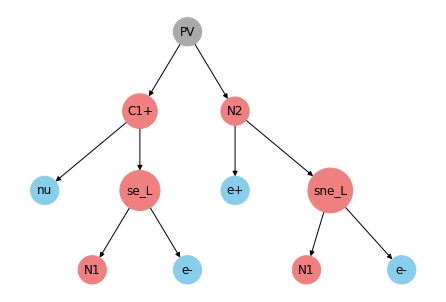

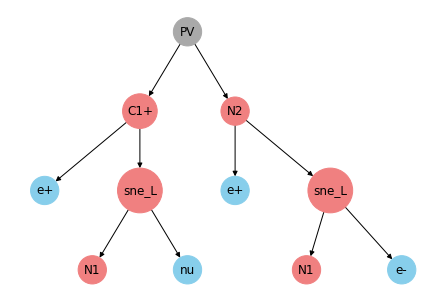

In [7]:
elA.drawTree()
elB.drawTree()

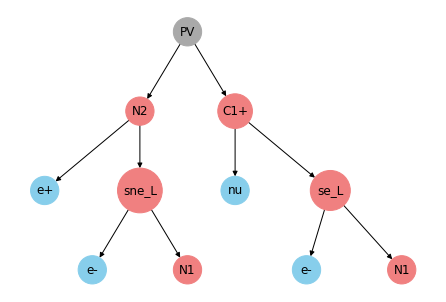

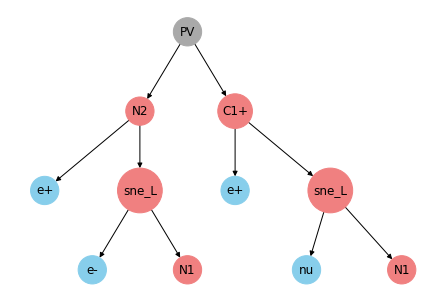

In [8]:
elMatchA = tx.hasElementAs(elA)
elMatchB = tx.hasElementAs(elB)
elMatchA.weight = 100*fb
elMatchB.weight = 5*pb
elMatchA.drawTree()
elMatchB.drawTree()

In [9]:
els = [elMatchA,elMatchB]

In [10]:
print(tx.evalConstraintFor(els))
print(tx.evalConstraintFor(els) == 2*(elMatchA.weight+elMatchB.weight))

1.02E+01 [pb]
True


In [11]:
print(tx.evalConditionsFor(els))

[0.9607843137254902, 0.5]
